In [ ]:
# Importar a base
from google.colab import files
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os
os.getcwd()
uploaded = files.upload()

# Carregue o arquivo CSV em um DataFrame
dataframe1 = pd.read_csv('/content/got-s1.csv',delimiter=',')
# Exiba as primeiras linhas do DataFrame
dataframe1.head(1)
# GrafoS1
GS1 = nx.from_pandas_edgelist(dataframe1,source='Source',target='Target',edge_attr='Weight')
print(GS1)

Graph with 126 nodes and 549 edges


In [ ]:
dataframe2 = pd.read_csv('/content/got-s8.csv',delimiter=',')
dataframe2.head(1)
GS2 = nx.from_pandas_edgelist(dataframe2,source='Source',target='Target',edge_attr='Weight')
print(GS2)

Graph with 74 nodes and 553 edges


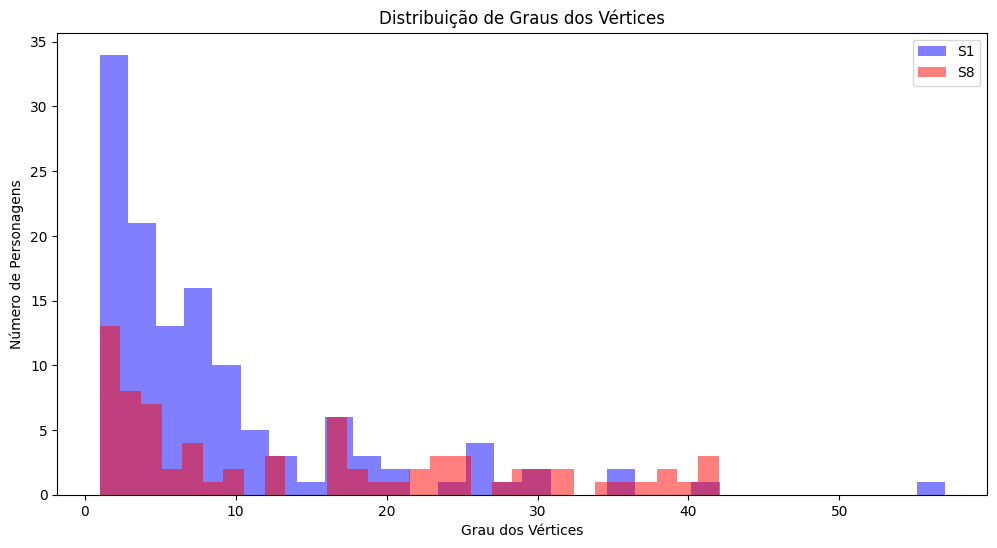

Medidas para a Primeira Temporada (S1):
Grau Médio: 8.714285714285714
Densidade: 0.06971428571428571
Transitividade: 0.38325183374083127

Medidas para a Oitava Temporada (S8):
Grau Médio: 14.945945945945946
Densidade: 0.20473898556090336
Transitividade: 0.6441837028505615


In [ ]:
# Exercício 01 Discuta quais as principais diferenças entre ambas as
# redes com base na distribuição de graus dos vértices
# (apresente os gráficos de histograma), grau médio, densidade e transitividade.
# Para estas três medidas, apresente os valores obtidos durante a discussão.

G_s1 = nx.Graph()
G_s8 = nx.Graph()

for index, row in dataframe1.iterrows():
    G_s1.add_edge(row['Source'], row['Target'], weight=row['Weight'])

for index, row in dataframe2.iterrows():
    G_s8.add_edge(row['Source'], row['Target'], weight=row['Weight'])

# Distribuição de Graus dos Vértices (Histograma)
degree_sequence_s1 = [d for n, d in G_s1.degree()]
degree_sequence_s8 = [d for n, d in G_s8.degree()]

plt.figure(figsize=(12, 6))
plt.hist(degree_sequence_s1, bins=30, alpha=0.5, color='b', label='S1')
plt.hist(degree_sequence_s8, bins=30, alpha=0.5, color='r', label='S8')
plt.xlabel('Grau dos Vértices')
plt.ylabel('Número de Personagens')
plt.legend()
plt.title('Distribuição de Graus dos Vértices')
plt.show()

# Grau Médio
avg_degree_s1 = sum(degree_sequence_s1) / len(degree_sequence_s1)
avg_degree_s8 = sum(degree_sequence_s8) / len(degree_sequence_s8)

# Densidade
density_s1 = nx.density(G_s1)
density_s8 = nx.density(G_s8)

# Transitividade
transitivity_s1 = nx.transitivity(G_s1)
transitivity_s8 = nx.transitivity(G_s8)

print("Medidas para a Primeira Temporada (S1):")
print(f"Grau Médio: {avg_degree_s1}")
print(f"Densidade: {density_s1}")
print(f"Transitividade: {transitivity_s1}")

print("\nMedidas para a Oitava Temporada (S8):")
print(f"Grau Médio: {avg_degree_s8}")
print(f"Densidade: {density_s8}")
print(f"Transitividade: {transitivity_s8}")


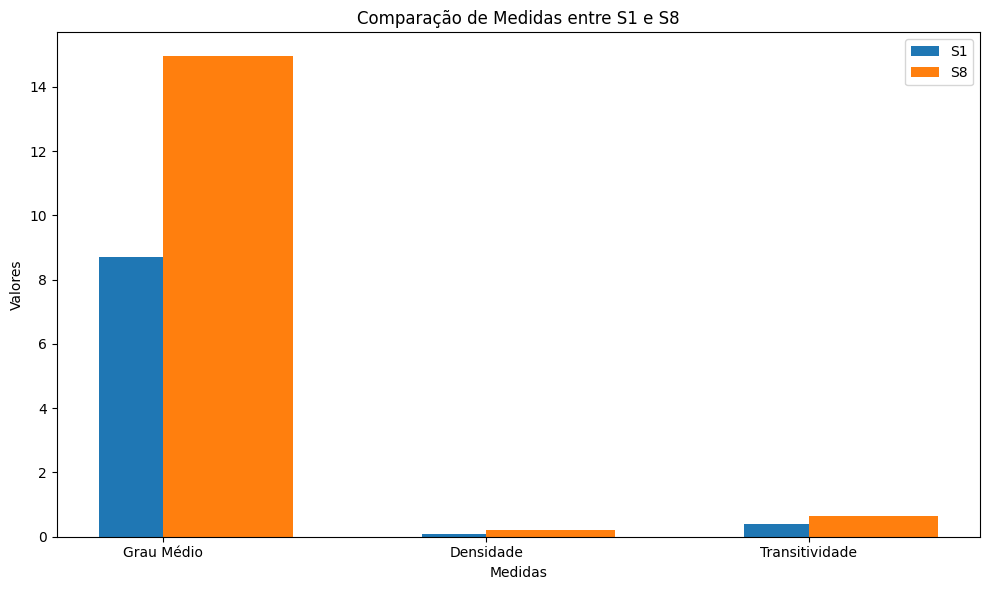

In [ ]:
# Crie um gráfico de barras para comparar as medidas
medidas = ['Grau Médio', 'Densidade', 'Transitividade']
valores_s1 = [avg_degree_s1, density_s1, transitivity_s1]
valores_s8 = [avg_degree_s8, density_s8, transitivity_s8]

x = range(len(medidas))

plt.figure(figsize=(10, 6))

plt.bar(x, valores_s1, width=0.4, label='S1', align='center')
plt.bar(x, valores_s8, width=0.4, label='S8', align='edge')

plt.xlabel('Medidas')
plt.ylabel('Valores')
plt.title('Comparação de Medidas entre S1 e S8')
plt.xticks(x, medidas)
plt.legend()
plt.tight_layout()

plt.show()

In [ ]:
# Grau Médio Mais Elevado na Oitava Temporada (S8):
# No gráfico acima, pode ser verificado que na oitava temporada, os personagens tinham,
# em média, mais interações e conexões com outros personagens do que na primeira temporada.
# Isso pode refletir uma maior complexidade e convergência da trama na última temporada.
# No resultado o grau médio na S8 é significativamente maior (aproximadamente 14.95) em comparação com a S1 (aproximadamente 8.71).

# Distribuição de Graus Mais Amplamente Variada na Primeira Temporada (S1):
# A S1 possui uma distribuição de graus dos vértices mais ampla e variada,
# como indicado pelo histograma anterior. Alguns personagens na S1 tinham um número muito alto de conexões,
# enquanto outros tinham menos. Isso sugere uma diversidade maior na importância dos personagens e nas interações entre eles.

# Densidade Mais Alta na Oitava Temporada (S8):
# A densidade da rede na S8 é maior (aproximadamente 0.205) em comparação com a S1 (aproximadamente 0.070).
# Isso significa que, na oitava temporada, havia mais interações em relação ao número potencial de interações possíveis,
# o que indica uma rede mais densamente conectada e uma maior interação entre personagens.

# Transitividade Mais Alta na Oitava Temporada (S8):
# * A transitividade na S8 é maior (aproximadamente 0.644) em comparação com a S1 (aproximadamente 0.383).
# Isso sugere que, na última temporada, havia uma maior probabilidade de que,
# se A estava conectado a B e B estava conectado a C, então A também estava conectado a C.
# Isso indica uma tendência maior de formação de grupos de personagens na oitava temporada.
# Em resumo, as principais diferenças nas redes da primeira temporada e da oitava temporada de Game of Thrones estão relacionadas ao grau médio,
# à distribuição de graus dos vértices, à densidade e à transitividade.
# A última temporada apresenta um grau médio mais elevado,
# uma rede mais densamente conectada e uma maior tendência à formação de grupos de personagens,
# indicando uma mudança na dinâmica das interações entre personagens ao longo da série.


In [ ]:
# Exercício 02
# Para cada uma das redes, identifique quem são os 3 personagens mais centrais de acordo com as medidas de centralidade de grau, intermediação, proximidade e autovetor. Algum destes personagens é central em ambas as temporadas?

# Medidas de centralidade
centralidade_grau_s1 = nx.degree_centrality(G_s1)
centralidade_grau_s8 = nx.degree_centrality(G_s8)

centralidade_intermediação_s1 = nx.betweenness_centrality(G_s1, normalized=True)
centralidade_intermediação_s8 = nx.betweenness_centrality(G_s8, normalized=True)

centralidade_proximidade_s1 = nx.closeness_centrality(G_s1)
centralidade_proximidade_s8 = nx.closeness_centrality(G_s8)

centralidade_autovetor_s1 = nx.eigenvector_centrality(G_s1)
centralidade_autovetor_s8 = nx.eigenvector_centrality(G_s8)

# Identificar os 3 personagens mais centrais em cada rede para cada medida
def top_n_centrality(centrality, n=3):
    return dict(sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:n])

top_3_grau_s1 = top_n_centrality(centralidade_grau_s1)
top_3_grau_s8 = top_n_centrality(centralidade_grau_s8)

top_3_intermediação_s1 = top_n_centrality(centralidade_intermediação_s1)
top_3_intermediação_s8 = top_n_centrality(centralidade_intermediação_s8)

top_3_proximidade_s1 = top_n_centrality(centralidade_proximidade_s1)
top_3_proximidade_s8 = top_n_centrality(centralidade_proximidade_s8)

top_3_autovetor_s1 = top_n_centrality(centralidade_autovetor_s1)
top_3_autovetor_s8 = top_n_centrality(centralidade_autovetor_s8)

print("Os 3 personagens mais centrais na Primeira Temporada (S1) de acordo com as medidas de centralidade:")
print("Grau:", list(top_3_grau_s1.keys()))
print("Intermediação:", list(top_3_intermediação_s1.keys()))
print("Proximidade:", list(top_3_proximidade_s1.keys()))
print("Autovetor:", list(top_3_autovetor_s1.keys()))

print("\nOs 3 personagens mais centrais na Oitava Temporada (S8) de acordo com as medidas de centralidade:")
print("Grau:", list(top_3_grau_s8.keys()))
print("Intermediação:", list(top_3_intermediação_s8.keys()))
print("Proximidade:", list(top_3_proximidade_s8.keys()))
print("Autovetor:", list(top_3_autovetor_s8.keys()))


Os 3 personagens mais centrais na Primeira Temporada (S1) de acordo com as medidas de centralidade:
Grau: ['NED', 'TYRION', 'ROBERT']
Intermediação: ['NED', 'TYRION', 'CATELYN']
Proximidade: ['NED', 'ROBERT', 'CATELYN']
Autovetor: ['NED', 'ROBERT', 'CERSEI']

Os 3 personagens mais centrais na Oitava Temporada (S8) de acordo com as medidas de centralidade:
Grau: ['SAM', 'DAENERYS', 'TYRION']
Intermediação: ['DAENERYS', 'SAM', 'ARYA']
Proximidade: ['SAM', 'DAENERYS', 'TYRION']
Autovetor: ['TYRION', 'SAM', 'SANSA']


In [ ]:
# No resultado acima pode ser verificado as treis principais personagens centrais em ambas as temporadas
# Portanto, de acordo com as medidas de centralidade de grau e intermediação, 'TYRION' e 'NED' são personagens centrais em ambas as temporadas,
# enquanto 'CATELYN' e 'ROBERT' também aparecem nas listas em uma das medidas.
# Esses personagens parecem ter importância contínua ao longo das temporadas em termos de centralidade
# na rede.

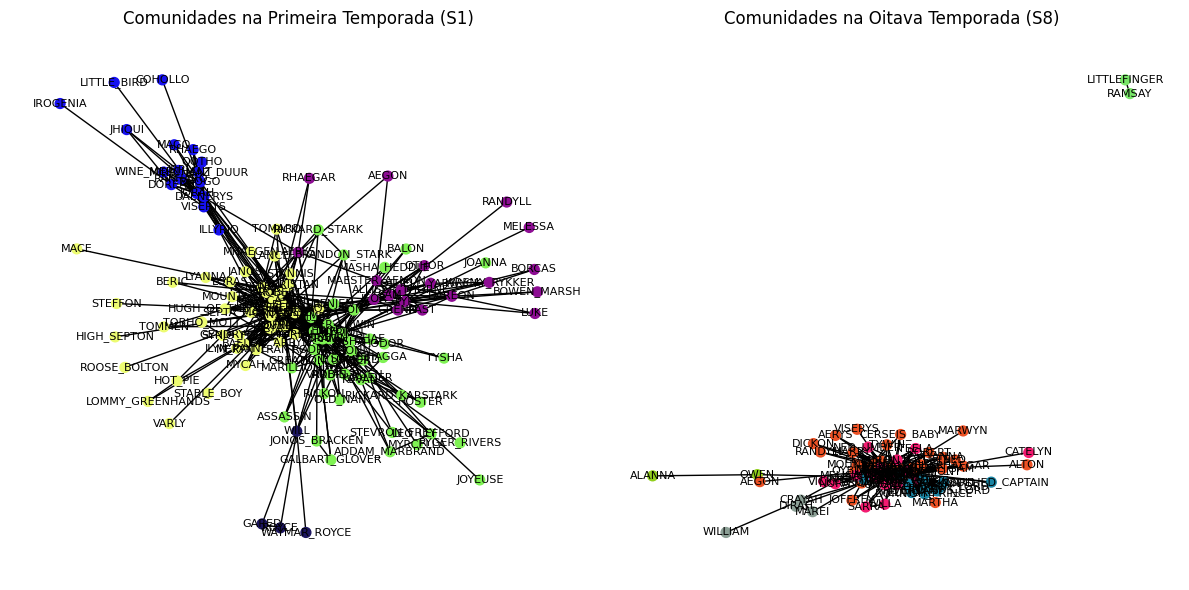

Número de comunidades na Primeira Temporada (S1): 5
Número de comunidades na Oitava Temporada (S8): 6


In [38]:
# Exercício 03
#  Execute o mesmo algoritmo de detecção de comunidades (de sua preferência) nas redes das duas temporadas. Apresente o grafo com os vértices coloridos de acordo com as comunidades encontradas e com os nomes dos vértices para sua identificação. O número de comunidades é o mesmo em ambos os casos? A partir de uma análise visual, é possível identificar uma comunidade similar (em termos de personagens) em ambas as temporadas?

import networkx as nx
import matplotlib.pyplot as plt
import random


# Função para gerar cores aleatórias para as comunidades
def gerar_cores_comunidades(grafo, particao):
    cores = {}
    for comunidade in set(particao.values()):
        cores[comunidade] = "#{:02x}{:02x}{:02x}".format(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    return [cores[particao[vertice]] for vertice in grafo.nodes()]


# Detecção de comunidades usando a biblioteca community em networkx
comunidades_s1 = list(nx.community.greedy_modularity_communities(G_s1))
comunidades_s8 = list(nx.community.greedy_modularity_communities(G_s8))

# Mapear vértices para comunidades
mapeamento_comunidades_s1 = {}
mapeamento_comunidades_s8 = {}

for i, comunidade in enumerate(comunidades_s1):
    for personagem in comunidade:
        mapeamento_comunidades_s1[personagem] = i

for i, comunidade in enumerate(comunidades_s8):
    for personagem in comunidade:
        mapeamento_comunidades_s8[personagem] = i

# Gerar cores aleatórias para as comunidades
cores_s1 = gerar_cores_comunidades(G_s1, mapeamento_comunidades_s1)
cores_s8 = gerar_cores_comunidades(G_s8, mapeamento_comunidades_s8)

# Visualização das redes com vértices coloridos por comunidade
plt.figure(figsize=(12, 6))
plt.subplot(121)
pos_s1 = nx.spring_layout(G_s1)
nx.draw(G_s1, pos_s1, node_color=cores_s1, with_labels=True, font_size=8, node_size=50)
plt.title("Comunidades na Primeira Temporada (S1)")

plt.subplot(122)
pos_s8 = nx.spring_layout(G_s8)
nx.draw(G_s8, pos_s8, node_color=cores_s8, with_labels=True, font_size=8, node_size=50)
plt.title("Comunidades na Oitava Temporada (S8)")

plt.tight_layout()
plt.show()

# Número de comunidades em cada temporada
num_comunidades_s1 = len(comunidades_s1)
num_comunidades_s8 = len(comunidades_s8)

print("Número de comunidades na Primeira Temporada (S1):", num_comunidades_s1)
print("Número de comunidades na Oitava Temporada (S8):", num_comunidades_s8)


In [ ]:
# O número de comunidades na primeira temporada e oitava temporada é diferente e não foi verificado comunidade similar.